In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import scipy
import os
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import itertools
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv("coches_dataset2.csv.csv")

#the dataset came with some undefined boolean variables, so let´s erase them 
#because it will be impossible to use them, we´ll also erase the location region
#due to its illegibility
df = df.drop(["feature_0","feature_1", "feature_2", "feature_3", "feature_4",
              "feature_5", "feature_5", "feature_6", "feature_7", "feature_8", 
              "feature_8", "feature_9", "location_region"], axis = 1)


df.tail(100)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed
38431,Chrysler,Pacifica,automatic,grey,244000,2007,gas,True,gasoline,4.0,minivan,False,owned,front,10500.0,True,5,12,89
38432,Chrysler,Voyager,mechanical,blue,321765,2001,diesel,False,diesel,2.5,minivan,False,owned,front,5300.0,False,4,11,84
38433,Chrysler,Stratus,mechanical,blue,314000,1998,gasoline,False,gasoline,2.0,sedan,False,owned,front,2300.0,True,8,3,88
38434,Chrysler,Grand Voyager,mechanical,blue,380000,1998,gasoline,False,gasoline,2.4,minivan,False,owned,front,3600.0,False,7,1,52
38435,Chrysler,Pacifica,automatic,grey,18507,2018,gasoline,False,gasoline,3.6,minivan,False,owned,front,48000.0,False,39,10,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,2750.0,True,5,85,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,hatchback,False,owned,front,4800.0,True,4,20,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,sedan,False,owned,front,4300.0,False,3,63,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,minivan,False,owned,front,4000.0,True,7,156,490


In [6]:
#Get some more info about the variables in the dataframe:
df.info()

#Know if there is any null value:
df.isnull().values.any() 

#Now how many null values are there in the variable where there are null values:
print(df['duration_listed'].isnull().sum())
print(df['engine_capacity'].isnull().sum())
#There is 1 nan in "duration_listed" variable and 10 in engine_capacity.

#Fill nan´s with the mean average of the respective variable
df['duration_listed'].fillna((df['duration_listed'].mean()), inplace=True)
df['engine_capacity'].fillna((df['engine_capacity'].mean()), inplace=True)
#Recheck if there is any null value
print(df.isnull().values.any())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  number_of_photos   385

In [7]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671091,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


[1.00000000e+00 1.66673333e+04 3.33336667e+04 5.00000000e+04]


(array([35878.,     0.,     0.,     0.,     0.,  2287.,     0.,     0.,
            0.,   366.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

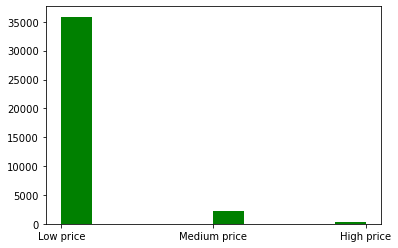

In [8]:
#We will divide the cars in price bins, so that we can see what is the amount of
#cars in each range
bins = np.linspace(min(df["price_usd"]), max(df["price_usd"]),4)
print(bins)
group_names = ["Low price", "Medium price", "High price"]
df["price_binned"]= pd.cut(df["price_usd"], bins, labels = group_names, include_lowest = True)
plt.hist(df["price_binned"], color = "green")

coefficients:  [453.61690586]
intercept:  -903997.62308115
Mean square error: 2876616.4006152274
Spected variance score: 0.7830816126233473


<function matplotlib.pyplot.show(close=None, block=None)>

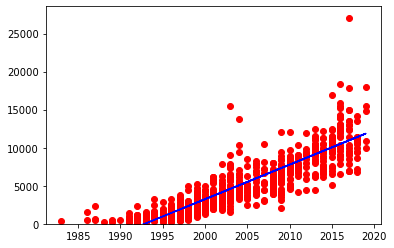

In [9]:
#LINEAR REGRESSION
#renault-seat years money
x = df.iloc[12046:14841,5].values
y = df.iloc[12046:14841,14].values

#split the data into training and testing sections:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

#reshape the array to convert it from 1d to 2d:
x_test = x_test.reshape(-1,1)
x_train = x_train.reshape(-1,1)

#choose the model:
lin_reg_model = LinearRegression()
#Fit the data to the model:
lin_reg_model.fit(x_train,y_train)

#Predict the output:
lin_reg_pred = lin_reg_model.predict(x_test)

#coef_ and intercept_ will be the coefficients and intercepts for
#our model, according to the function: y = mx + c
print("coefficients: ", lin_reg_model.coef_)
print("intercept: ", lin_reg_model.intercept_)

#The mean squared error will be calculated with the built in function:
print("Mean square error:", mean_squared_error(y_test, lin_reg_pred))

#The spected variance score (where 1 is a perfect prediction) is:
print("Spected variance score:", r2_score(y_test, lin_reg_pred))

#Plot the graph:
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_test, lin_reg_pred, color = "blue")
plt.ylim(0)
plt.xlim()
plt.show

Text(0.5, 0, 'Model')

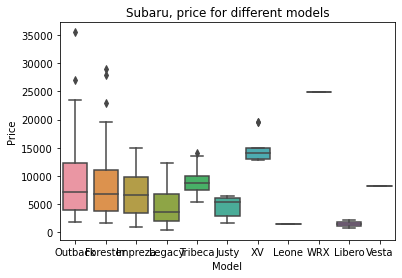

In [10]:
#There's too many models and different prices for those models for the graphic to show
#us some relevant information; in order to better show that correlation
#We will create a boxplot to compare how price varies for a concrete brand
#In our dataset the data for Subaru is listed from line 1 to 192
sns.boxplot(x = "model_name", y = "price_usd", data = df[:292])
plt.title("Subaru, price for different models")
plt.ylabel("Price")
plt.xlabel("Model")

Text(0.5, 0, 'Model')

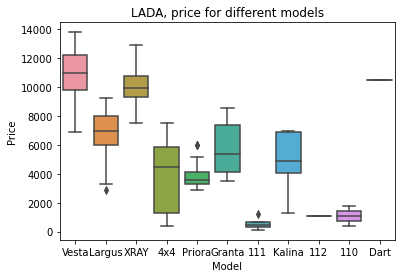

In [11]:
sns.boxplot(x = "model_name", y = "price_usd", data = df[293:438])
plt.title("LADA, price for different models")
plt.ylabel("Price")
plt.xlabel("Model")

In [12]:
#Grouping
df['engine_fuel'].unique()

df_group_one = df[['engine_fuel', 'manufacturer_name','price_usd']]

df_gptest = df[['engine_fuel', 'manufacturer_name', 'price_usd']]
grouped_test1 = df_gptest.groupby(['engine_fuel', 'manufacturer_name'], as_index = False).mean()
grouped_test1

,engine_fuel,manufacturer_name,price_usd
0,diesel,Alfa Romeo,3240.799298
1,diesel,Audi,8502.332835
2,diesel,BMW,11723.686241
3,diesel,Chery,1750.000000
4,diesel,Chevrolet,12609.292174
...,...,...,...
171,hybrid-petrol,Porsche,21700.000000
172,hybrid-petrol,Renault,1150.000000
173,hybrid-petrol,Rover,2000.000000
174,hybrid-petrol,Toyota,13629.626866


In [13]:
grouped_pivot = grouped_test1.pivot(index='manufacturer_name',columns='engine_fuel')
grouped_pivot

price_usd                                       \
engine_fuel              diesel electric           gas      gasoline   
manufacturer_name                                                      
Acura                       NaN      NaN  10555.500000  12915.943065   
Alfa Romeo          3240.799298      NaN   2206.838000   2488.069793   
Audi                8502.332835      NaN   2515.206400   6862.516491   
BMW                11723.686241  32374.5   5064.364600   8301.653287   
Buick                       NaN      NaN           NaN  12699.717391   
Cadillac                    NaN      NaN  14800.000000   9054.336286   
Chery               1750.000000      NaN           NaN   4595.030351   
Chevrolet          12609.292174  12950.0   8800.315385   8538.618451   
Chrysler            5345.423649      NaN   4953.508000   4908.341686   
Citroen             4877.135883      NaN   3214.054615   4118.541388   
Dacia               8367.529412      NaN   4299.800000   4093.928108   
Daewoo                      NaN      NaN   1689.355238   1564.770350   
Dodge               8262.250000      NaN   5142.397969   5691.777642   
Fiat                4256.509603  15450.0   3559.996207   2163.165143   
Ford                5045.777495      NaN   3060.873158   5038.196035   
Geely                       NaN      NaN   9225.000000   7682.321045   
Great Wall          5600.000000      NaN   5033.333333   6805.548929   
Honda               6006.036316      NaN   4683.273913   6545.977504   
Hyundai             9721.960399      NaN   4250.379730   7406.239524   
Infiniti           23141.500000      NaN  10150.000000  13653.007042   
Iveco              10074.868235      NaN   9950.000000   7190.000000   
Jaguar             25176.722222      NaN           NaN  14025.942857   
Jeep               10036.120952      NaN   9921.000000  11666.763621   
Kia                 8387.306553      NaN   3781.465909   8220.076076   
LADA                        NaN      NaN   9991.500000   7496.132000   
Lancia              3444.279714      NaN   1847.428571   2669.139600   
Land Rover         16611.725000      NaN   8260.000000  13529.140423   
Lexus               9202.200000      NaN  17583.166667  17418.038683   
Lifan                       NaN      NaN   8827.000000   8268.656522   
Lincoln                     NaN      NaN   8425.000000   9814.676471   
Mazda               3522.667399      NaN   2901.812632   4981.000582   
Mercedes-Benz       8761.102312      NaN   5114.376471  10525.962177   
Mini               12999.000000      NaN           NaN  13135.711343   
Mitsubishi          6415.713471      NaN   4484.540256   5226.255746   
Nissan              5720.742389  13210.0   4698.485714   6776.505937   
Opel                5154.891971      NaN   3087.395250   3930.670252   
Peugeot             4995.767878      NaN   3138.055577   4049.758900   
Pontiac              900.000000      NaN   3950.000000   4501.860811   
Porsche            31745.000000      NaN   9000.000000  17310.085000   
Renault             5782.782461      NaN   2949.158250   3730.777689   
Rover               2115.836863      NaN   1874.500000   1620.900782   
Saab                4275.000000      NaN   3176.555000   4111.586707   
Seat                5518.524444      NaN   2323.835000   3195.161546   
Skoda              14818.418261      NaN   8019.900000  13649.670860   
SsangYong           7937.108615      NaN   5066.333333   7155.946364   
Subaru             10907.912500      NaN   6075.706667   7568.532193   
Suzuki              4573.266667      NaN   6311.700000   5306.660813   
Toyota             10366.720184      NaN  11875.364444   9165.543525   
Volkswagen          7681.224150      NaN   5458.814127   5215.818763   
Volvo              11288.750140      NaN   4543.364667   7363.025273   
ВАЗ                 2746.780000      NaN   1753.024000   1503.391392   
ГАЗ                12219.178000      NaN   2141.100714   3405.782739   
ЗАЗ                         NaN      NaN           NaN   1360.

In [14]:
#Replace NaN values
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price_usd                                       \
engine_fuel              diesel electric           gas      gasoline   
manufacturer_name                                                      
Acura                  0.000000      0.0  10555.500000  12915.943065   
Alfa Romeo          3240.799298      0.0   2206.838000   2488.069793   
Audi                8502.332835      0.0   2515.206400   6862.516491   
BMW                11723.686241  32374.5   5064.364600   8301.653287   
Buick                  0.000000      0.0      0.000000  12699.717391   
Cadillac               0.000000      0.0  14800.000000   9054.336286   
Chery               1750.000000      0.0      0.000000   4595.030351   
Chevrolet          12609.292174  12950.0   8800.315385   8538.618451   
Chrysler            5345.423649      0.0   4953.508000   4908.341686   
Citroen             4877.135883      0.0   3214.054615   4118.541388   
Dacia               8367.529412      0.0   4299.800000   4093.928108   
Daewoo                 0.000000      0.0   1689.355238   1564.770350   
Dodge               8262.250000      0.0   5142.397969   5691.777642   
Fiat                4256.509603  15450.0   3559.996207   2163.165143   
Ford                5045.777495      0.0   3060.873158   5038.196035   
Geely                  0.000000      0.0   9225.000000   7682.321045   
Great Wall          5600.000000      0.0   5033.333333   6805.548929   
Honda               6006.036316      0.0   4683.273913   6545.977504   
Hyundai             9721.960399      0.0   4250.379730   7406.239524   
Infiniti           23141.500000      0.0  10150.000000  13653.007042   
Iveco              10074.868235      0.0   9950.000000   7190.000000   
Jaguar             25176.722222      0.0      0.000000  14025.942857   
Jeep               10036.120952      0.0   9921.000000  11666.763621   
Kia                 8387.306553      0.0   3781.465909   8220.076076   
LADA                   0.000000      0.0   9991.500000   7496.132000   
Lancia              3444.279714      0.0   1847.428571   2669.139600   
Land Rover         16611.725000      0.0   8260.000000  13529.140423   
Lexus               9202.200000      0.0  17583.166667  17418.038683   
Lifan                  0.000000      0.0   8827.000000   8268.656522   
Lincoln                0.000000      0.0   8425.000000   9814.676471   
Mazda               3522.667399      0.0   2901.812632   4981.000582   
Mercedes-Benz       8761.102312      0.0   5114.376471  10525.962177   
Mini               12999.000000      0.0      0.000000  13135.711343   
Mitsubishi          6415.713471      0.0   4484.540256   5226.255746   
Nissan              5720.742389  13210.0   4698.485714   6776.505937   
Opel                5154.891971      0.0   3087.395250   3930.670252   
Peugeot             4995.767878      0.0   3138.055577   4049.758900   
Pontiac              900.000000      0.0   3950.000000   4501.860811   
Porsche            31745.000000      0.0   9000.000000  17310.085000   
Renault             5782.782461      0.0   2949.158250   3730.777689   
Rover               2115.836863      0.0   1874.500000   1620.900782   
Saab                4275.000000      0.0   3176.555000   4111.586707   
Seat                5518.524444      0.0   2323.835000   3195.161546   
Skoda              14818.418261      0.0   8019.900000  13649.670860   
SsangYong           7937.108615      0.0   5066.333333   7155.946364   
Subaru             10907.912500      0.0   6075.706667   7568.532193   
Suzuki              4573.266667      0.0   6311.700000   5306.660813   
Toyota             10366.720184      0.0  11875.364444   9165.543525   
Volkswagen          7681.224150      0.0   5458.814127   5215.818763   
Volvo              11288.750140      0.0   4543.364667   7363.025273   
ВАЗ                 2746.780000      0.0   1753.024000   1503.391392   
ГАЗ                12219.178000      0.0   2141.100714   3405.782739   
ЗАЗ                    0.000000      0.0      0.000000   1360.

In [15]:
#normalize the data (centered to 0)
from sklearn.preprocessing import StandardScaler

df_num = df._get_numeric_data()

scaler = StandardScaler() # This creats a new OBJECT that has methods and attributes
scaler.fit(df_num) # Ask our scaler to process the data and calculate all parameteres necessary for the scaling (the means and variances)
print ("Means: ", scaler.mean_) # We can now see what are the parameter values our scaler has calculated, means_ stores the mean values for each feature
print ("Variances: ", scaler.var_) # var_ stores the variances for each feature

df_centred = scaler.transform(df_num) # Now ask our scaler to scale the data we pass it using the parameters it has calculated
print ("\nSome of our data :\n", df_centred[:5])

# We can also do the fit and the transform of our data in a single call
df_centred = scaler.fit_transform(df_num)
print ("\nSee that the result is the same if we do everything in a single go :\n", df_centred[:5])

Means:  [2.48864638e+05 2.00294373e+03 3.49588643e-02 2.05516111e+00
 1.16529548e-02 6.63997102e+03 3.52599206e-01 9.64906179e+00
 1.63060912e+01 8.05772495e+01]
Variances:  [1.85152111e+10 6.50543203e+01 3.37367421e-02 4.50350856e-01
 1.15171634e-02 4.13200660e+07 2.28273006e-01 3.71263298e+01
 1.87370995e+03 1.27295042e+04]

Some of our data :
 [[-0.43260362  0.87485665 -0.19032934  0.66286831 -0.10858336  0.66272301
  -0.73799607 -0.1065234  -0.07637719 -0.57236596]
 [ 0.30230894 -0.11700687 -0.19032934  1.4079339  -0.10858336 -0.25512656
   1.35502076  0.38583374  0.87080316  0.02147351]
 [ 1.125411   -0.24098981 -0.19032934  0.66286831 -0.10858336 -0.59737555
   1.35502076 -0.92711865  1.28663843  0.62417625]
 [-1.75544621 -0.48895569 -0.19032934  1.4079339  -0.10858336  0.52255649
   1.35502076 -0.1065234   0.59357964  0.04806333]
 [ 0.22881768 -0.24098981 -0.19032934  0.66286831 -0.10858336 -0.70096654
   1.35502076  0.71407184 -0.21498894 -0.65213544]]

See that the result is t

In [16]:
df["model_name"]

0           Outback
1           Outback
2          Forester
3           Impreza
4            Legacy
            ...    
38526           300
38527    PT Cruiser
38528           300
38529    PT Cruiser
38530       Voyager
Name: model_name, Length: 38531, dtype: object

(0.0, 14699.346239623035)

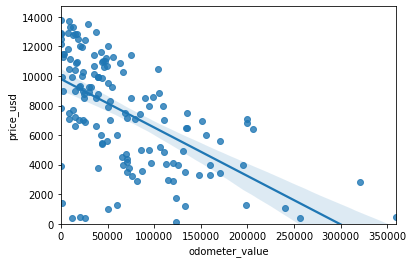

In [18]:
#Predict the pice of the car depending on the odometer value
#Import sklearn library
from sklearn.linear_model import LinearRegression

#Create a Linear Regression Object
lm = LinearRegression()

#Variables
X = df[['odometer_value']]
Y = df['price_usd']

#Fit the model
lm.fit(X, Y)

#Yhat prediction
Yhat = lm.predict (X)

#Plot the prediction as a linear regression
import seaborn as sns

sns.regplot(x='odometer_value', y='price_usd', data = df[292:438])
plt.ylim(0,)